# Fantasy Football Baseline

Below is the baseline model of how FPL can be played. 

In the example, every week the worst player is removed from the team (this "worst" metric is decided as who accumulated the least points at a point in time). 

This player is then replaced with the "best" available player of the same positition (this "best" metric is decided as who has accumulated the most points at a point in time)

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import matplotlib.pyplot as plt
import json
import csv
from IPython import display
%matplotlib inline
import seaborn as sns
import sys
sys.path.append('../')
from FPL.fpl import *
from itertools import count
import pickle
from IPython.display import display


In [3]:
from FPL.next_actions.agent import *
from FPL.next_actions.dqn import *

/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/.fpl_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data into the environment

All the below info is from 2021

In [4]:
from FPL.load_data import *

/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/load_data.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_info_refined = player_info_DEF_refined.append(player_info_MID_refined).append(player_info_FWD_refined).append(player_info_GKP_refined)
/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/load_data.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_info_refined = player_info_DEF_refined.append(player_info_MID_refined).append(player_info_FWD_refined).append(player_info_GKP_refined)
/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/load_data.py:16: FutureWarning: The frame.append met

## Run a single Iteration

Below the best and worst player are removed each week based on an arbitary metric. The players are continuously swapped in and out until the season is complete


*Best/Worst player are defined by points accumulated over the entire period

Reward 63.0, transfers made 1


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Giovani Lo Celso,TOT,MID,Bruno Miguel Borges Fernandes,MUN,982,63.0,3,1,36,False,"[Mason Mount, Gylfi Sigurdsson, Jack Grealish,...","[Yerry Mina, Timothy Castagne, Thiago Thiago, ...","[Timo Werner, Edinson Cavani, Olivier Giroud]","[Dean Henderson, Edouard Mendy]"


Reward 116.0, transfers made 2


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Jack Grealish,AVL,MID,Mohamed Salah,LIV,928,116.0,4,2,35,False,"[Mason Mount, Gylfi Sigurdsson, Pierre-Emerick...","[Yerry Mina, Timothy Castagne, Thiago Thiago, ...","[Timo Werner, Edinson Cavani, Olivier Giroud]","[Dean Henderson, Edouard Mendy]"


Reward 178.0, transfers made 3


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Yerry Mina,EVE,DEF,Stuart Dallas,LEE,928,178.0,5,3,34,False,"[Mason Mount, Gylfi Sigurdsson, Pierre-Emerick...","[Timothy Castagne, Thiago Thiago, César Azpili...","[Timo Werner, Edinson Cavani, Olivier Giroud]","[Dean Henderson, Edouard Mendy]"


Reward 231.0, transfers made 4


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Thiago Thiago,CHE,DEF,Rúben Santos Gato Alves Dias,MCI,925,231.0,6,4,33,False,"[Mason Mount, Gylfi Sigurdsson, Pierre-Emerick...","[Timothy Castagne, César Azpilicueta, Aaron Cr...","[Timo Werner, Edinson Cavani, Olivier Giroud]","[Dean Henderson, Edouard Mendy]"


Reward 264.0, transfers made 5


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Timothy Castagne,LEI,DEF,Lucas Digne,EVE,921,264.0,7,5,32,False,"[Mason Mount, Gylfi Sigurdsson, Pierre-Emerick...","[César Azpilicueta, Aaron Cresswell, Stuart Da...","[Timo Werner, Edinson Cavani, Olivier Giroud]","[Dean Henderson, Edouard Mendy]"


Reward 331.0, transfers made 6


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Edinson Cavani,MUN,FWD,Jamie Vardy,LEI,899,331.0,8,6,31,False,"[Mason Mount, Gylfi Sigurdsson, Pierre-Emerick...","[César Azpilicueta, Aaron Cresswell, Stuart Da...","[Timo Werner, Olivier Giroud, Jamie Vardy]","[Dean Henderson, Edouard Mendy]"


Reward 382.0, transfers made 7


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Aaron Cresswell,WHU,DEF,Andrew Robertson,LIV,883,382.0,9,7,30,False,"[Mason Mount, Gylfi Sigurdsson, Pierre-Emerick...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Timo Werner, Olivier Giroud, Jamie Vardy]","[Dean Henderson, Edouard Mendy]"


Reward 443.0, transfers made 8


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Dean Henderson,MUN,GKP,Ederson Santana de Moraes,MCI,874,443.0,10,8,29,False,"[Mason Mount, Gylfi Sigurdsson, Pierre-Emerick...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Timo Werner, Olivier Giroud, Jamie Vardy]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 500.0, transfers made 9


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Olivier Giroud,CHE,FWD,Roberto Firmino,LIV,850,500.0,11,9,28,False,"[Mason Mount, Gylfi Sigurdsson, Pierre-Emerick...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Timo Werner, Jamie Vardy, Roberto Firmino]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 572.0, transfers made 10


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Gylfi Sigurdsson,EVE,MID,Sadio Mané,LIV,800,572.0,12,10,27,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Timo Werner, Jamie Vardy, Roberto Firmino]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 620.0, transfers made 11


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Timo Werner,CHE,FWD,Sergio Agüero,MCI,789,620.0,13,11,26,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 666.0, transfers made 12


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,666.0,14,12,25,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 785.0, transfers made 13


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,785.0,15,13,24,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 840.0, transfers made 14


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,840.0,16,14,23,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 884.0, transfers made 15


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,884.0,17,15,22,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 919.0, transfers made 16


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,919.0,18,16,21,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 942.0, transfers made 17


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,942.0,19,17,20,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1048.0, transfers made 18


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,1048.0,20,18,19,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1106.0, transfers made 19


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,1106.0,21,19,18,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1176.0, transfers made 20


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,1176.0,22,20,17,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1231.0, transfers made 21


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,1231.0,23,21,16,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1280.0, transfers made 22


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,1280.0,24,22,15,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1359.0, transfers made 23


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,1359.0,25,23,14,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1436.0, transfers made 24


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,1436.0,26,24,13,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1550.0, transfers made 25


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,1550.0,27,25,12,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1598.0, transfers made 26


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,1598.0,28,26,11,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1672.0, transfers made 27


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,1672.0,29,27,10,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1676.0, transfers made 28


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,1676.0,30,28,9,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1730.0, transfers made 29


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,1730.0,31,29,8,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1789.0, transfers made 30


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,1789.0,32,30,7,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1822.0, transfers made 31


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,1822.0,33,31,6,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1868.0, transfers made 32


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,1868.0,34,32,5,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 1918.0, transfers made 33


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,1918.0,35,33,4,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 2059.0, transfers made 34


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,2059.0,36,34,3,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 2086.0, transfers made 35


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,2086.0,37,35,2,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 2137.0, transfers made 36


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Andrew Robertson,LIV,DEF,Trent Alexander-Arnold,LIV,784,2137.0,38,36,1,False,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Reward 2218.0, transfers made 37


/Users/diane.odonoghue/Library/CloudStorage/OneDrive-Accenture/Documents/RL/FPL/RLFantasyPremierLeague/notebooks/../FPL/fpl.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary=self.summary.append(pd.json_normalize(game_dict))[self.summarylabels]


,old_player,old_player_team,old_player_position,new_player,new_player_team,budget,reward_accumulated,game_week,transfers_made,no_fixtures_remaining,league_complete,players.MID,players.DEF,players.FWD,players.GKP
0,Trent Alexander-Arnold,LIV,DEF,Andrew Robertson,LIV,789,2218.0,39,37,0,True,"[Mason Mount, Pierre-Emerick Aubameyang, Bruno...","[César Azpilicueta, Stuart Dallas, Rúben Santo...","[Jamie Vardy, Roberto Firmino, Sergio Agüero]","[Edouard Mendy, Ederson Santana de Moraes]"


Complete


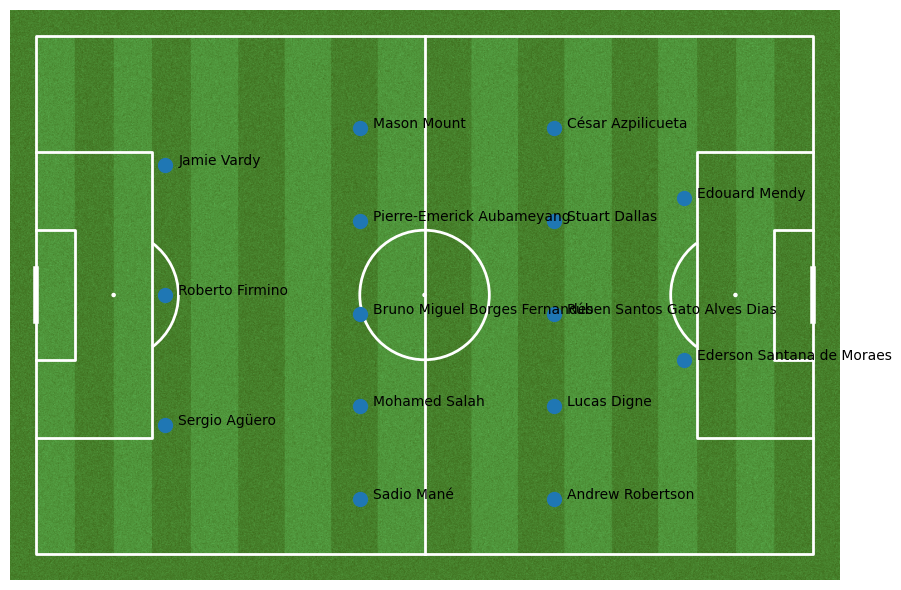

In [5]:
# Set empty reward_list
reward_list = []
## Reset the board for an episode
env = FPL(player_info_refined_all, fixture_data_finished, teams)
    
## Play the first match
## No swaps are needed at this point
env.play_match(player_match_info_refined)
    
# Keep playing until the the game is over
while not env.episode_over:
        
    # Only choose players that have never been chosen before
    player_state = env.current_player_state.copy()
        
    ## Build function to update list week to week
    available_players = env._get_available_players()
    ## Choose the player which performed worse last match to be removed
    action_p1 = env._get_worst_performing_pool_player()

    ## Allow only for one transfer at the moment
    transfers = 1
    ## Build function to update list week to week
    new_player = env._get_best_available_performing_player(action_p1, available_players)
    
    ## Hard code only 1 valid transfer for now
    ## TODO - allow for more
    old_players = [action_p1]
    new_players = [new_player]

    reward_p1 = env._step(player_match_info_refined, transfers, old_players, new_players)
        
    reward_list.append(reward_p1)
    print('Reward {}, transfers made {}'.format(reward_p1, env.transfers_made))
    display(env._render())
    
        
        
print('Complete')
env.display_current_team()
plt.show()